# Taanshu Babariya 03
## 21/01/26
### Experiment-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.
### ML LAB
### PID - 246001

In [1]:
#Step-1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Step-2: Input data
x = np.array([10,20,30,50]).reshape(-1,1)
y = np.array([12,21,29,48])

In [3]:
#Step-3: Create model and Fit data
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [4]:
#Step-4: Get Coefficients and print
w = model.coef_[0]
b = model.intercept_
print(f"The slope is: {w}")
print(f"The intercept is: {b}")

The slope is: 0.8971428571428574
The intercept is: 2.828571428571422


In [5]:
#Step-5: Make predictions
y_pred = model.predict(x)
print("\nPredictions fro traning data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi},Predicted y = {ypi}")


Predictions fro traning data
x = 10, Actual y = 12,Predicted y = 11.799999999999995
x = 20, Actual y = 21,Predicted y = 20.77142857142857
x = 30, Actual y = 29,Predicted y = 29.742857142857144
x = 50, Actual y = 48,Predicted y = 47.68571428571429


In [15]:
#Step-6: error calculate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Sqaured Error is: {mse}")
print(f"R2 Score is: {r2}")

Mean Sqaured Error is: 176.2499918469759
R2 Score is: 4.625829286286631e-08


## LR Using MLE

In [6]:
#Step-1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [16]:
#Step-2: Input data
x = np.array([10,20,30,50])
y = np.array([12,21,29,48])

In [17]:
#Step-3: Negative Log Likelihood function
def neg_log_likelihood(params):
    w,b = params
    sigma2 = 1 # assume varience =1
    y_pred = w*x + b
    nll = 0.5*np.sum((y-y_pred)**2 /sigma2)
    return nll

In [18]:
# Initial values fro w and b
initial_guess= [0,0]

In [19]:
# Step-4: Minimize nll
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"Slope is: {w_mle}")
print(f"Intercept is: {b_mle}")

Slope is: 0.8971428246616441
Intercept is: 2.828572315886469


In [20]:
#Step-5: Prediction
y_pred = w_mle * x + b_mle
print("\npredictions for  training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi},Predicted y = {ypi}")


predictions for  training data
x = 10, Actual y = 12,Predicted y = 11.800000562502909
x = 20, Actual y = 21,Predicted y = 20.77142880911935
x = 30, Actual y = 29,Predicted y = 29.74285705573579
x = 50, Actual y = 48,Predicted y = 47.68571354896867


In [21]:
#Step-6: error calculate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Sqaured Error is: {mse}")
print(f"R2 Score is: {r2}")

Mean Sqaured Error is: 0.18571428571451654
R2 Score is: 0.998946301925024


## LR Using GD

In [23]:
#Step-1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [24]:
#Step-2: Input data
x = np.array([10,20,30,50])
y = np.array([12,21,29,48])

In [36]:
#Step-3: 
w, b =0,0
alpha = 0.001
n_iter = 10000
n = len(x)

In [37]:
for i in range(n_iter):
    y_pred = w * x.flatten() + b
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w = w -alpha * dw
    b -= alpha * db
print(f"The slope is: {w}")
print(f"The bais is: {b}")

The slope is: 0.8980343164542518
The bais is: 2.7969724110901857


## LR USing GD with single parameter

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#Step-2: Input data
x = np.array([10,20,30,50])
y = np.array([12,21,29,48])

In [41]:
#Step-3: Calculate Loss function
def loss(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y-y_pred)**2)

In [42]:
#Step-4: Calculate gradient of J wrt w1

In [44]:
def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1 * x + w0
    return -2*np.sum(x * (y-y_pred))

In [46]:
#Gradient decent
lr = 0.1
w1 = 4
n_iter = 15
w1_values = []
loss_values = []

for i in range(n_iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr*grad

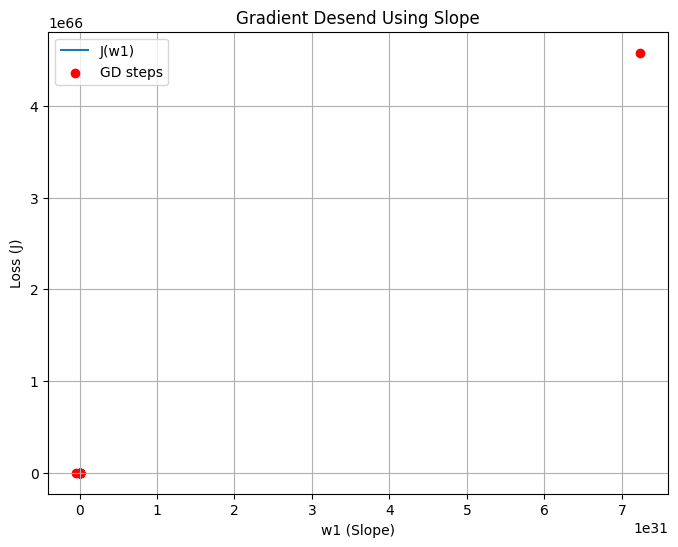

In [53]:
#Step-6: Plot loss function and GD
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize = (8,6))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="GD steps")
plt.xlabel("w1 (Slope)")
plt.ylabel("Loss (J)")
plt.title("Gradient Desend Using Slope")
plt.legend()
plt.grid(True)
plt.show()